In [1]:
import tensorflow as tf
import keras
import retina
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics

In [12]:
df = pd.read_csv(retina.filesys.TRAINING_DATA_CSV_PATH, index_col=False)
labels = df["label"]
df = df.drop(columns=["label"])
df = df.loc[:,tuple(filter(lambda x: x.startswith("texture"), df.columns))]
df

,texture-1,texture-2,texture-3,texture-4,texture-5,texture-6,texture-7,texture-8,texture-9,texture-10,...,texture-481,texture-482,texture-483,texture-484,texture-485,texture-486,texture-487,texture-488,texture-489,texture-490
0,0.004661,0.005579,0.001271,0.000212,0.001483,0.000494,0.000282,0.001342,0.001836,0.003248,...,0.006214,0.003460,0.003813,0.000565,0.002048,0.000847,0.000212,0.000777,0.000353,0.002118
1,0.003460,0.005579,0.003743,0.000141,0.001765,0.000353,0.000212,0.002189,0.000989,0.001977,...,0.004943,0.001977,0.002895,0.000353,0.001342,0.003248,0.000353,0.002189,0.000918,0.002189
2,0.005437,0.007344,0.002472,0.000071,0.001271,0.000777,0.000141,0.001483,0.000353,0.001059,...,0.007415,0.002966,0.002754,0.000424,0.001342,0.000636,0.000494,0.001130,0.000706,0.002542
3,0.005861,0.003178,0.001059,0.000141,0.000636,0.001412,0.000141,0.001695,0.002189,0.004096,...,0.004661,0.005437,0.003813,0.000071,0.001200,0.001200,0.000353,0.001483,0.000706,0.001483
4,0.003531,0.002683,0.002895,0.000141,0.003319,0.000212,0.000000,0.004308,0.000565,0.002754,...,0.006638,0.004378,0.003390,0.000424,0.001200,0.000636,0.000353,0.000847,0.000353,0.002189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,0.003248,0.003319,0.002260,0.000424,0.001836,0.000565,0.000071,0.001483,0.003813,0.003390,...,0.003460,0.003531,0.005649,0.000424,0.002401,0.000353,0.000353,0.001271,0.000353,0.002613
408,0.003178,0.003248,0.000989,0.000212,0.001130,0.000282,0.000000,0.002613,0.004943,0.003813,...,0.003178,0.002118,0.003531,0.000494,0.003319,0.000706,0.000071,0.003460,0.000918,0.002613
409,0.002754,0.004873,0.000777,0.000353,0.000918,0.000494,0.000141,0.001624,0.004096,0.004378,...,0.005014,0.001554,0.001765,0.000353,0.001412,0.001483,0.000706,0.003390,0.002260,0.002472
410,0.003531,0.003813,0.001836,0.000353,0.002542,0.000424,0.000071,0.001412,0.001907,0.004519,...,0.004873,0.001907,0.002895,0.000777,0.001342,0.000918,0.000424,0.002754,0.000989,0.003531


In [13]:
dataset = tf.data.Dataset.from_tensor_slices((df, labels))
train_dataset, test_dataset = keras.utils.split_dataset(dataset, shuffle=True, seed=42, left_size=0.7)
train_dataset, validation_dataset = keras.utils.split_dataset(train_dataset, shuffle=True, seed=42, left_size=0.7)

train_dataset: tf.data.Dataset = train_dataset.repeat(5).shuffle(100).batch(16)
test_dataset: tf.data.Dataset = test_dataset.batch(16)
validation_dataset: tf.data.Dataset = validation_dataset.batch(16)

dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(490,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.float64, name=None))>

In [16]:
model = keras.Sequential([
  keras.layers.Input(shape=dataset.element_spec[0].shape),
  keras.layers.Dense(512, activation="relu"),
  keras.layers.Dropout(0.3),
  keras.layers.Dense(512, activation="relu"),
  keras.layers.Dense(6, activation="softmax"),
])

model.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001), # type: ignore
  loss=keras.losses.SparseCategoricalCrossentropy(),
  metrics=["accuracy"],
)

In [17]:
history = model.fit(
  train_dataset, epochs=30,
  validation_data=validation_dataset,
)

Epoch 1/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.2671 - loss: 1.7568 - val_accuracy: 0.2093 - val_loss: 1.8417
Epoch 2/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2728 - loss: 1.7039 - val_accuracy: 0.3256 - val_loss: 1.7759
Epoch 3/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4303 - loss: 1.5726 - val_accuracy: 0.3256 - val_loss: 1.6517
Epoch 4/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5094 - loss: 1.3621 - val_accuracy: 0.3605 - val_loss: 1.4833
Epoch 5/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5511 - loss: 1.1785 - val_accuracy: 0.4070 - val_loss: 1.4119
Epoch 6/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5823 - loss: 1.0277 - val_accuracy: 0.4767 - val_loss: 1.2940
Epoch 7/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6200 - loss: 0.9312 - val_accuracy: 0.4535 - val_loss: 1.2848
Epoch 8/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6715 - loss: 0.8670 - val_accuracy: 0.5581 - val_los

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


C:\Users\Davin Tristan\AppData\Local\Temp\ipykernel_19928\2105622587.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


{'Angry': {'precision': 0.5, 'recall': 0.5, 'f1-score': 0.5, 'support': 18.0},
 'Disgusted': {'precision': 0.5238095238095238,
  'recall': 0.6875,
  'f1-score': 0.5945945945945946,
  'support': 16.0},
 'Happy': {'precision': 0.8620689655172413,
  'recall': 0.8333333333333334,
  'f1-score': 0.847457627118644,
  'support': 30.0},
 'Neutral': {'precision': 0.6086956521739131,
  'recall': 0.7368421052631579,
  'f1-score': 0.6666666666666666,
  'support': 19.0},
 'Sad': {'precision': 0.7368421052631579,
  'recall': 0.7,
  'f1-score': 0.717948717948718,
  'support': 20.0},
 'Surprised': {'precision': 1.0,
  'recall': 0.6666666666666666,
  'f1-score': 0.8,
  'support': 21.0},
 'accuracy': 0.7016129032258065,
 'macro avg': {'precision': 0.7052360411273059,
  'recall': 0.6873903508771931,
  'f1-score': 0.6877779343881039,
  'support': 124.0},
 'weighted avg': {'precision': 0.7302022648632025,
  'recall': 0.7016129032258065,
  'f1-score': 0.7077651883283376,
  'support': 124.0}}

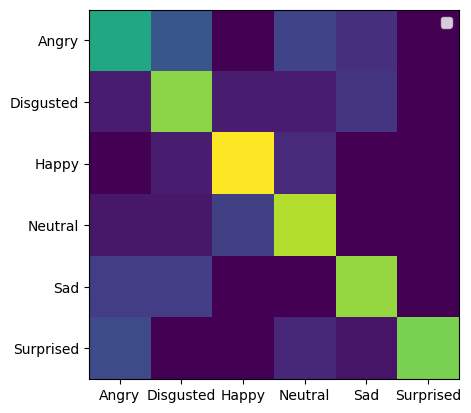

In [18]:
from typing import cast

confidences = model.predict(test_dataset)
predictions = np.argmax(confidences, axis=1)

labels = cast(list[int], list(test_dataset.unbatch().map(lambda x, y: y).as_numpy_iterator()))
target_names = retina.face.FacialExpressionLabel.target_names()

cmat = sklearn.metrics.confusion_matrix(labels, predictions, normalize="true")

plt.imshow(cmat)
plt.legend()
plt.xticks(range(len(target_names)), target_names)
plt.yticks(range(len(target_names)), target_names)

sklearn.metrics.classification_report(labels, predictions, output_dict=True, target_names=target_names)

In [19]:
model.save(retina.filesys.EXPRESSION_RECOGNITION_MODEL_PATH)

C:\Users\Davin Tristan\AppData\Local\Temp\ipykernel_19928\469801421.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  accuracy_fig.show()


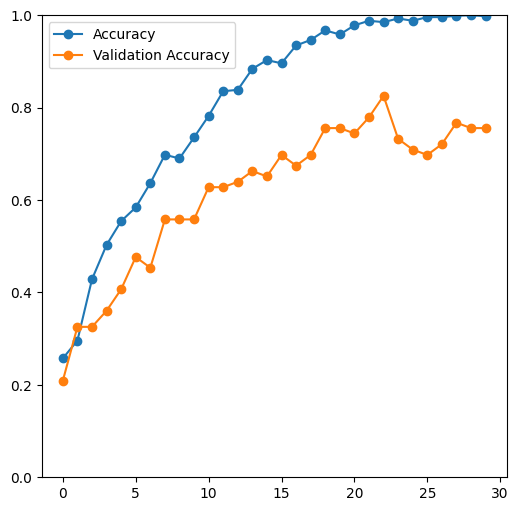

In [20]:
accuracy_fig = plt.figure(figsize=(6,6))
ax = accuracy_fig.add_subplot()
ax.plot(history.history["accuracy"], label="Accuracy", marker='o')
ax.plot(history.history["val_accuracy"], label="Validation Accuracy", marker='o')
ax.legend()
ax.set_ylim(0, 1)
accuracy_fig.show()